In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [4]:
import os
os.getcwd()


df = pd.read_csv("Downloads/titanic_data_org.csv")

In [5]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
df.shape

(418, 12)

In [8]:
df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name     Sex   Age  SibSp  Parch  \
0                                Kelly, Mr. James    male  34.5      0      0   
1                Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                       Myles, Mr. Thomas Francis    male  62.0      0      0   
3                                Wirz, Mr. Albert    male  27.0      0      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
..                       

Columns such as Age, Cabin, and Embarked contain missing values, which may affect further analysis and will require appropriate handling during preprocessing.

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### survived

In [13]:
df['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

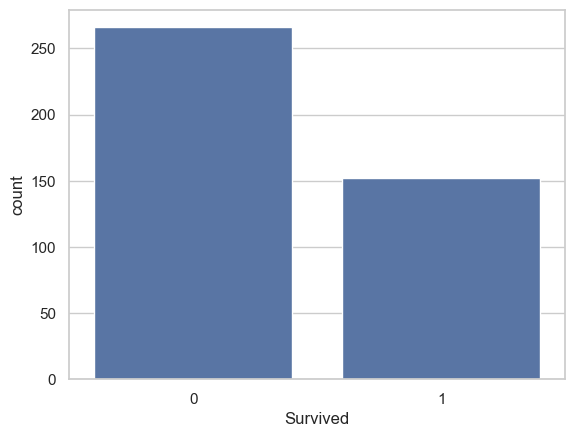

In [14]:
sns.countplot(x='Survived', data=df)
plt.show()


### Age

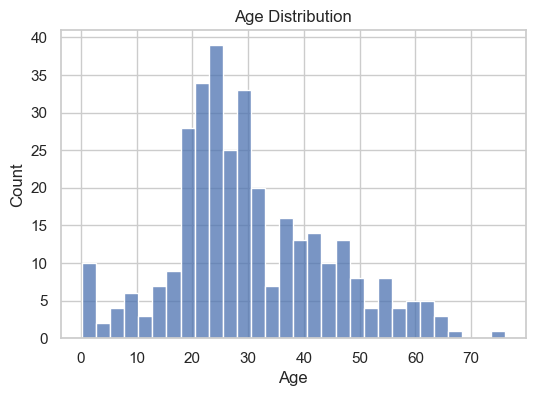

In [43]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=30)
plt.title("Age Distribution")
plt.savefig("age_distribution.png", bbox_inches='tight')
plt.show()


The histogram shows that most passengers were between young and middle age, with fewer passengers at extreme ages.

### fare

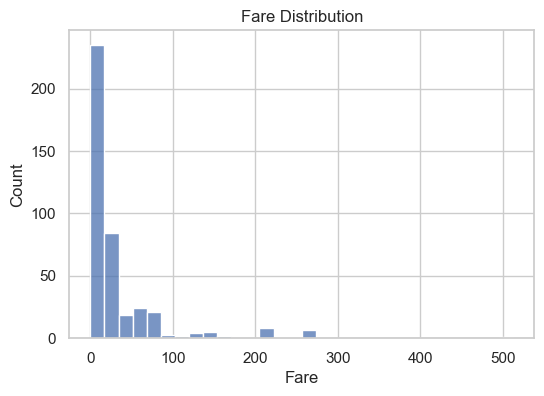

In [44]:
plt.figure(figsize=(6,4))
sns.histplot(df['Fare'], bins=30)
plt.title("Fare Distribution")
plt.savefig("fare_distribution.png", bbox_inches='tight')
plt.show()


The fare distribution is right-skewed, meaning most passengers paid lower fares while a small number paid very high fares.

### sex

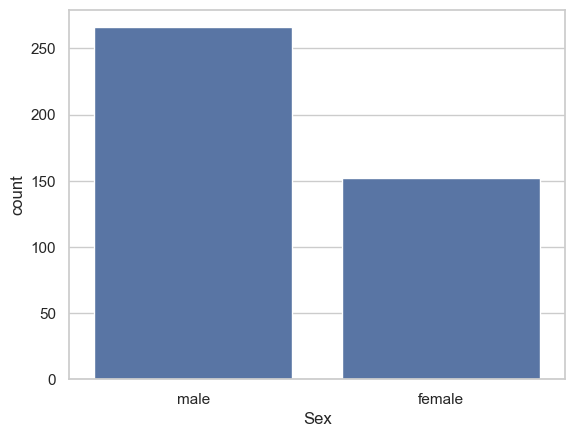

In [21]:
sns.countplot(x='Sex', data=df)
plt.show()

### survival VS sex

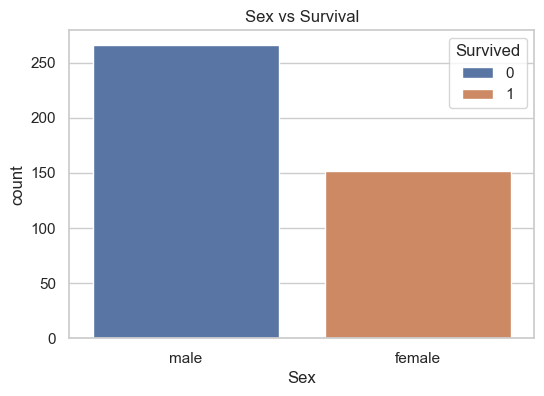

In [40]:
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Sex vs Survival")
plt.savefig("sex_vs_survival.png", bbox_inches='tight')
plt.show()


The count plot shows that female passengers had a higher number of survivors compared to male passengers, indicating that gender had an impact on survival.

### Survival VS Pclass

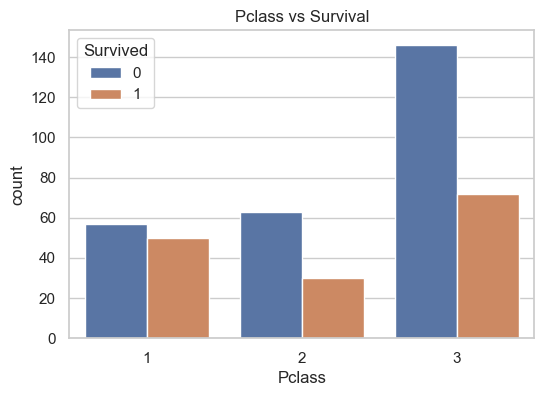

In [42]:
plt.figure(figsize=(6,4))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title("Pclass vs Survival")
plt.savefig("pclass_vs_survival.png", bbox_inches='tight')
plt.show()


Passengers traveling in first class showed higher survival counts compared to second and third class passengers.

### Numerical VS categorical

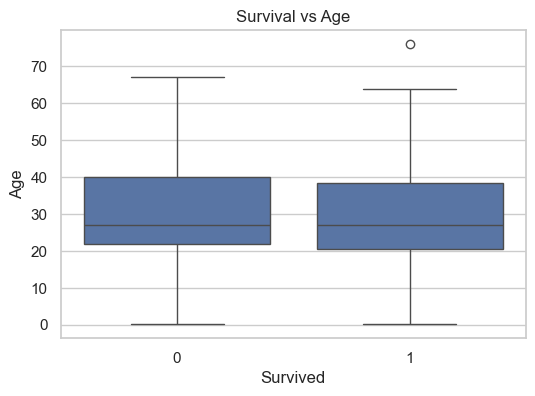

In [45]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Survived', y='Age', data=df)
plt.title("Survival vs Age")
plt.savefig("survival_vs_age.png", bbox_inches='tight')
plt.show()


The box plot indicates a difference in age distribution between survivors and non-survivors.

### Survival VS fare

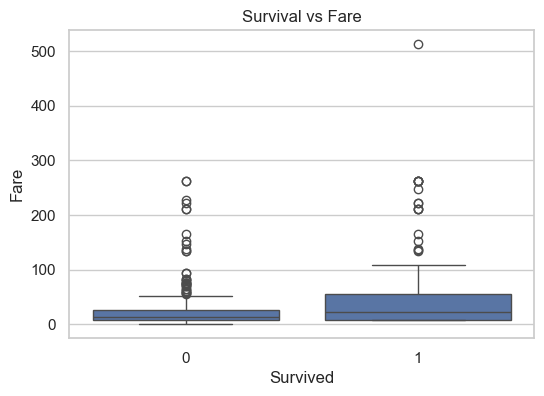

In [46]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Survived', y='Fare', data=df)
plt.title("Survival vs Fare")
plt.savefig("survival_vs_fare.png", bbox_inches='tight')
plt.show()


The box plot shows that passengers who survived generally paid higher fares compared to those who did not survive.

## Additional features were created to explore patterns related to family size and cabin availability.

## family size

In [30]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1
# why +1?
# Because the passengers themselves counts as a family.

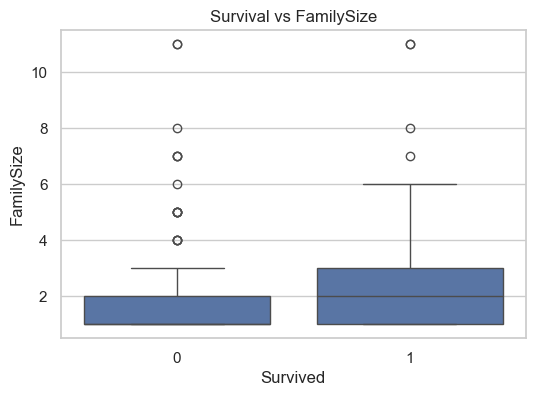

In [47]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Survived', y='FamilySize', data=df)
plt.title("Survival vs FamilySize")
plt.savefig("survival_vs_familySize.png", bbox_inches='tight')
plt.show()

In [35]:
df['HasCabin'] = df['Cabin'].notnull().astype(int)

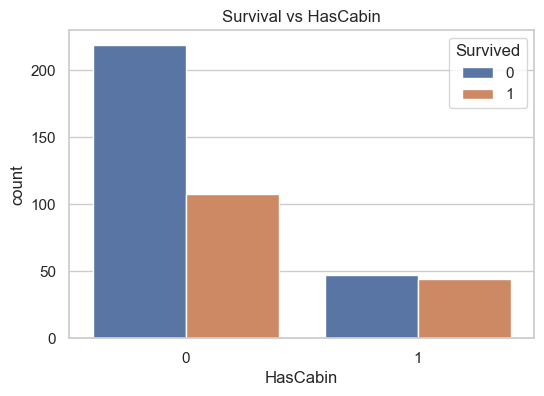

In [49]:
plt.figure(figsize=(6,4))
sns.countplot(x='HasCabin', hue='Survived', data=df)
plt.title("Survival vs HasCabin")
plt.savefig("survival_vs_HasCabin.png", bbox_inches='tight')
plt.show()

In this exploratory data analysis, various categorical and numerical features were analyzed to understand their relationship with passenger survival. Visualizations indicate that factors such as gender, passenger class, age, and fare show noticeable differences between survivors and non-survivors. The dataset also contains missing values, highlighting the need for data cleaning before further analysis.